In [1]:
%matplotlib inline

In [2]:
import pathlib

In [3]:
from matplotlib import pyplot as plt 
import proplot as plot 

In [4]:
import geopandas as gpd 

In [5]:
HOME = pathlib.Path.home() 

### path to the shapefiles 

In [6]:
dpath = HOME / 'research' / 'Smart_Ideas' / 'data' / 'shapefiles' / 'application_cases' / 'Mangatawhiri'

In [7]:
list_shapefiles = list(dpath.glob('*.shp'))

In [8]:
list_shapefiles

[PosixPath('/home/nicolasf/research/Smart_Ideas/data/shapefiles/application_cases/Mangatawhiri/W_Source.shp'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/data/shapefiles/application_cases/Mangatawhiri/RainGauge.shp'),
 PosixPath('/home/nicolasf/research/Smart_Ideas/data/shapefiles/application_cases/Mangatawhiri/SurfaceWater_SourceCatchment.shp')]

### quick plot of the geometries for each file 

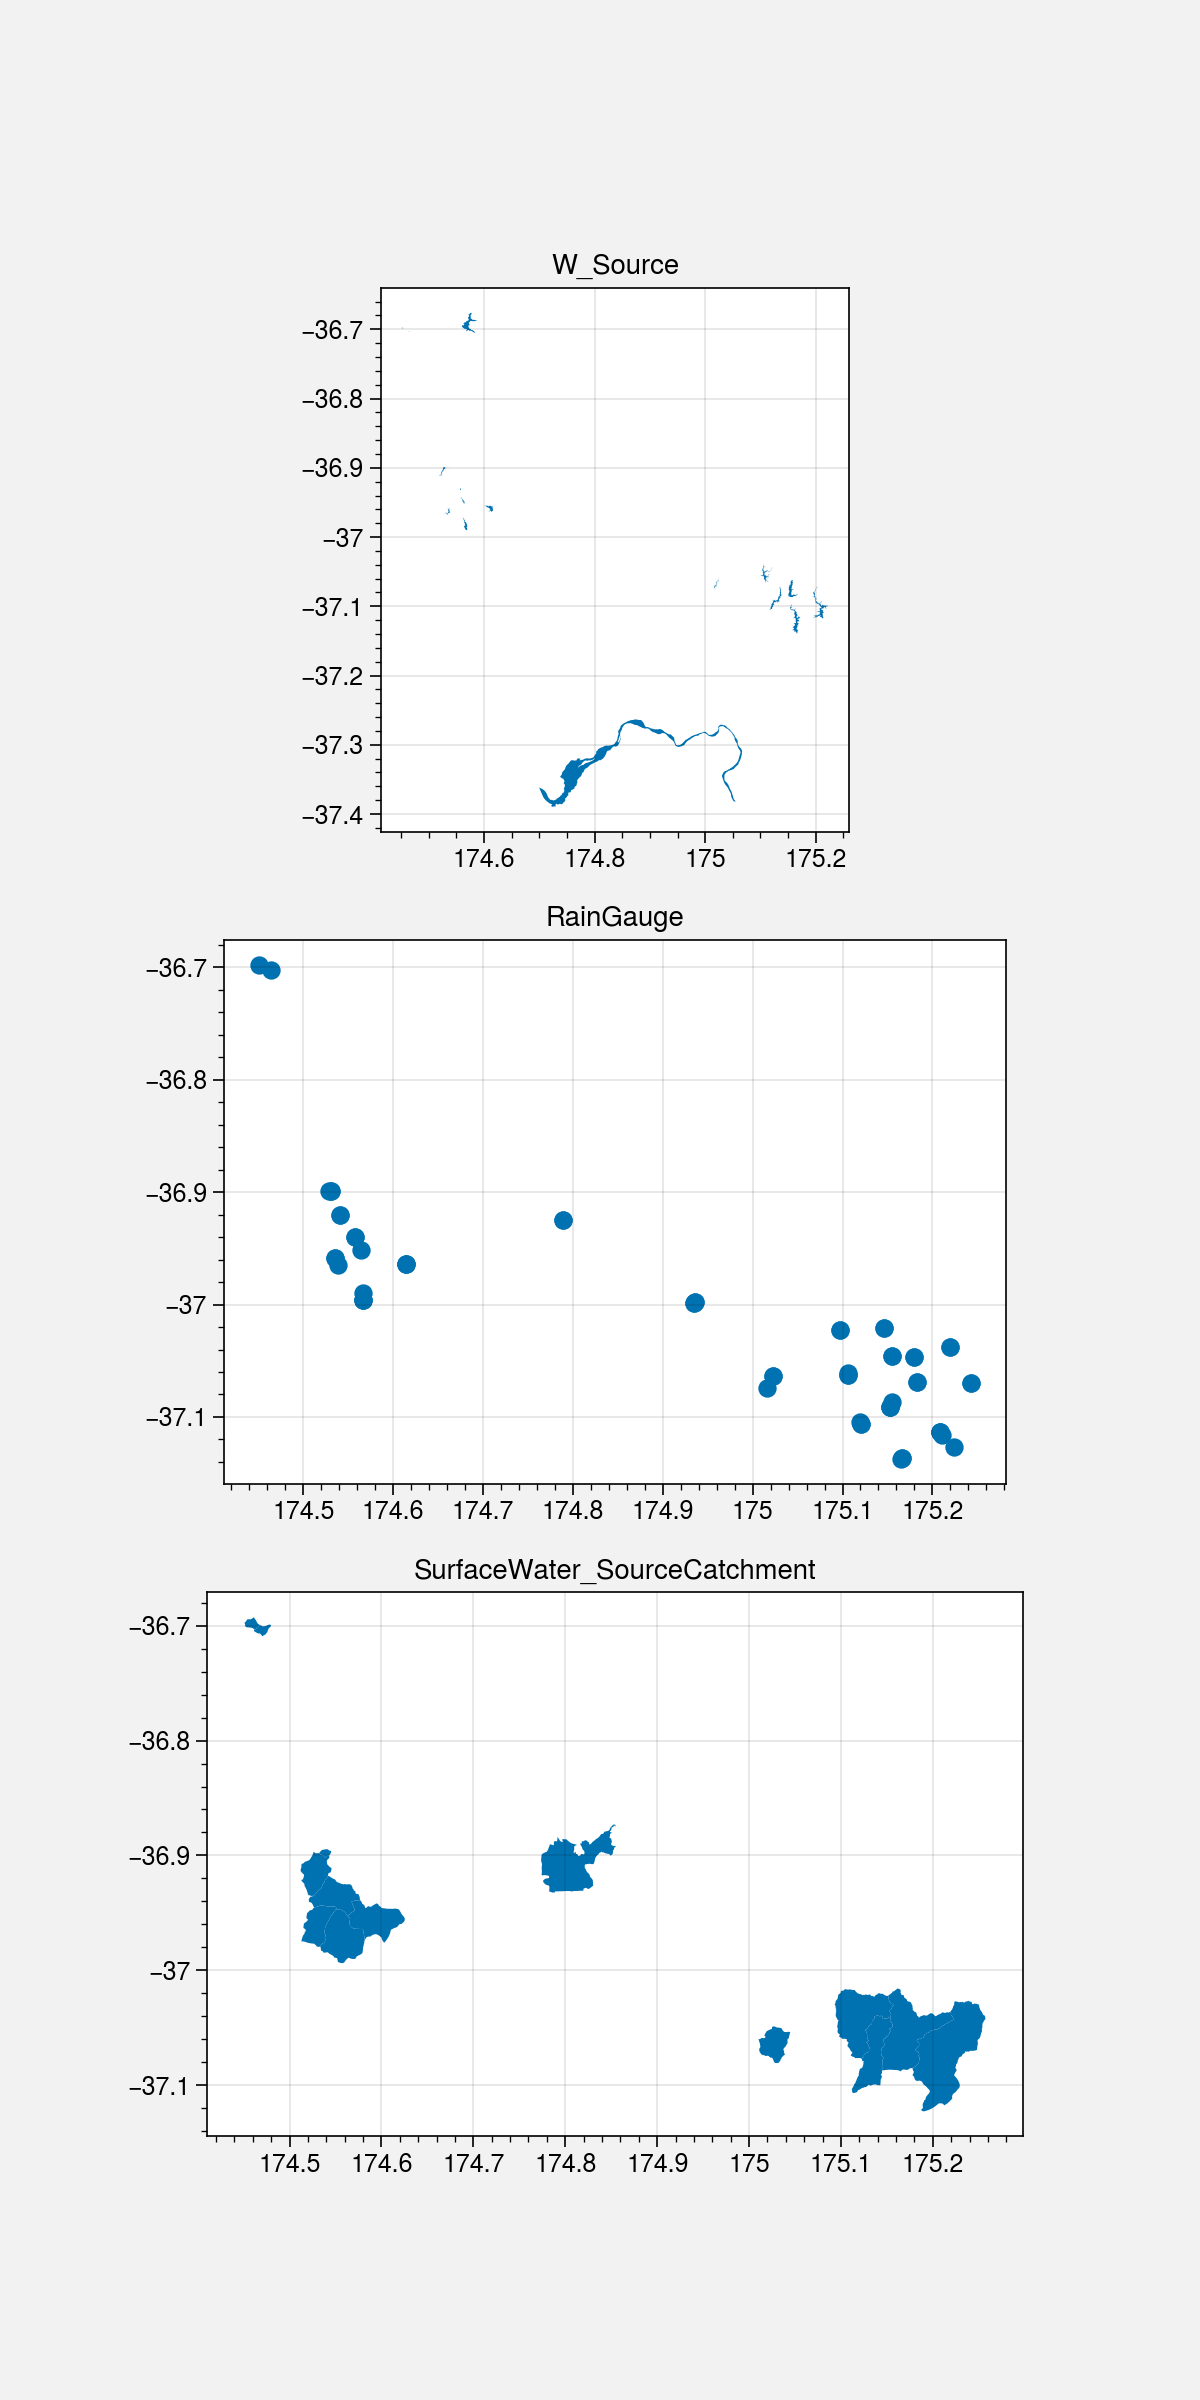

In [9]:
f, axes = plt.subplots(nrows=3, figsize=(6, 12))
for i, shapefile in enumerate(list_shapefiles): 
    shape = gpd.read_file(shapefile)
    name = shapefile.name.split('.')[0]
    shape = shape.to_crs(epsg=4326)
    shape.to_file(f"./{name}.json", driver="GeoJSON")
    shape.plot(ax=axes[i])
    axes[i].set_title(name)

### read the `SurfaceWater_SourceCatchment.shp` shapefile 

In [10]:
shape = gpd.read_file(list_shapefiles[1])
name = shapefile.name.split('.')[0]
shape = shape.to_crs(epsg=4326)

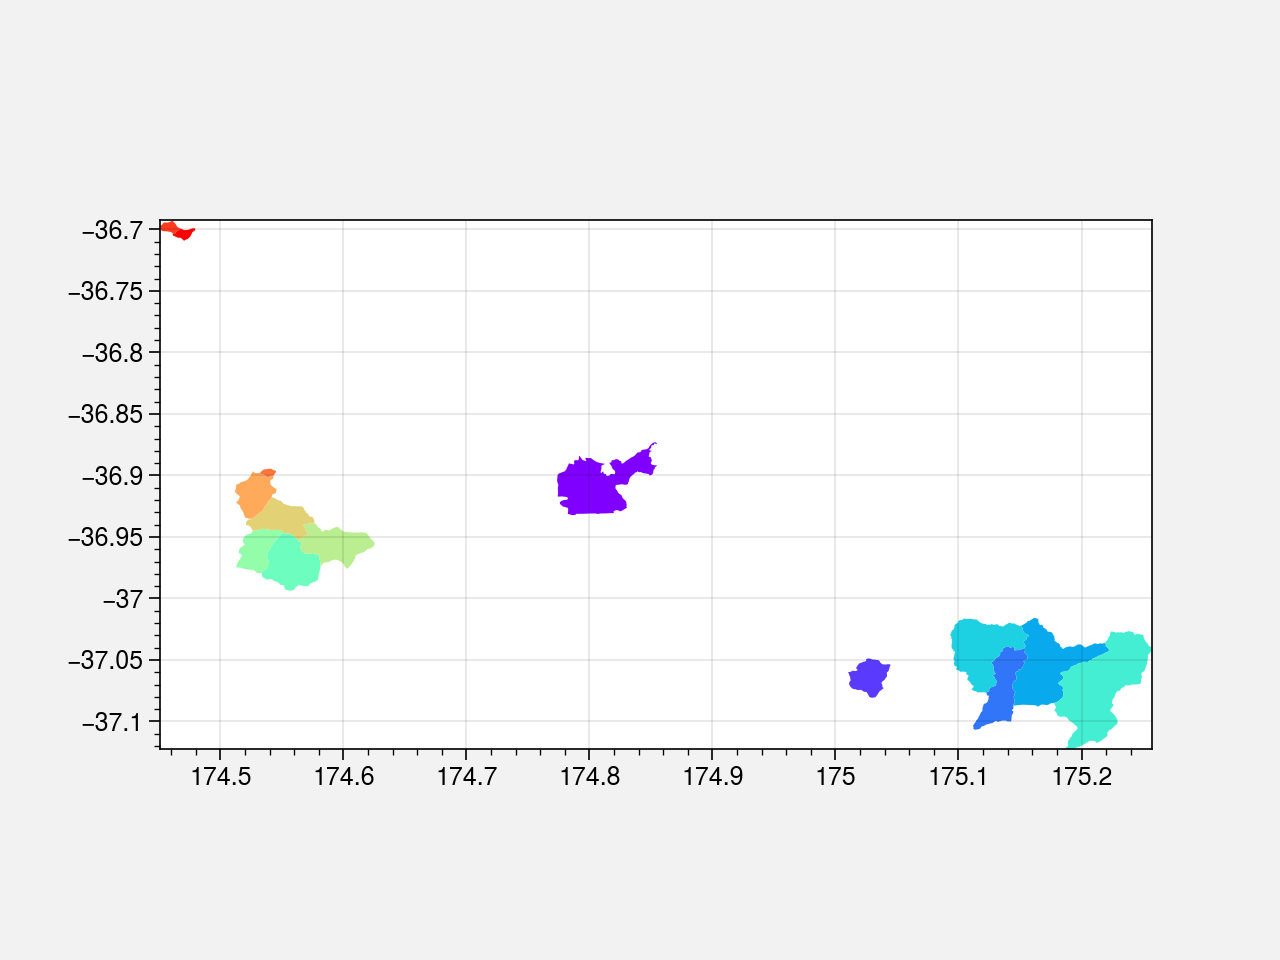

In [11]:
shape.plot(cmap=plt.cm.rainbow)

In [12]:
shape.head()

,GIS_ID,FAC_CODE,LABEL,GRP,GRP_CODE,LAND_AREA,MSLINK,CREATEBY,CREATEDATE,MODIFYBY,MODIFYDATE,MODIFYREF,geometry
0,23635,None,Onehunga Aquifer,GW,None,23954948.81,0,wsl,2006-04-13,wsl,2006-04-13,CameronKng,"POLYGON ((174.80060 -36.93099, 174.79825 -36.9..."
1,23642,SDHAY,Hays Creek,SD,None,6743584.47,0,wsl,2006-04-13,wsl,2006-04-13,CameronKng,"POLYGON ((175.04454 -37.05369, 175.04490 -37.0..."
2,23646,SDWRA,Wairoa,SD,None,13270030.78,0,wsl,2006-04-13,wsl,2006-04-13,CameronKng,"POLYGON ((175.11179 -37.10332, 175.11199 -37.1..."
3,23644,SMMRI,Mangatawhiri,SD,None,25525776.42,0,wsl,2006-04-13,wsl,2006-04-13,CameronKng,"POLYGON ((175.14373 -37.07254, 175.14368 -37.0..."
4,23630,SDCOS,Cosseys,SD,None,21478632.56,0,wsl,2006-04-13,wsl,2006-04-13,CameronKng,"POLYGON ((175.09309 -37.02965, 175.09318 -37.0..."


### HUNUAS ranges geometries 

In [13]:
hunuas = ['Cosseys', 'Wairoa', 'Mangatawhiri', 'Mangatangi']

### WAITAKERE ranges geometries 

In [14]:
waitak = ['Kelly Creek', 'Waitakere', 'Upper Nihotupu', 'Upper Huia', 'Lower Huia', 'Lower Nihotupu']

### set the LABEL column to be the index of the geodataframe 

In [15]:
shape = shape.set_index('LABEL', drop=True)

### selects only the geometries corresponding to the Hunua and the Waitakere ranges

In [16]:
shape = shape.loc[hunuas + waitak,:]

### create a `catchment` colum that will be used to merge the geometries 

In [17]:
shape.loc[waitak,'catchment'] = 'W'

In [18]:
shape.loc[hunuas,'catchment'] = 'H'

In [19]:
shape

,GIS_ID,FAC_CODE,GRP,GRP_CODE,LAND_AREA,MSLINK,CREATEBY,CREATEDATE,MODIFYBY,MODIFYDATE,MODIFYREF,geometry,catchment
LABEL,,,,,,,,,,,,,
Cosseys,23630,SDCOS,SD,None,21478632.56,0,wsl,2006-04-13,wsl,2006-04-13,CameronKng,"POLYGON ((175.09309 -37.02965, 175.09318 -37.0...",H
Wairoa,23646,SDWRA,SD,None,13270030.78,0,wsl,2006-04-13,wsl,2006-04-13,CameronKng,"POLYGON ((175.11179 -37.10332, 175.11199 -37.1...",H
Mangatawhiri,23644,SMMRI,SD,None,25525776.42,0,wsl,2006-04-13,wsl,2006-04-13,CameronKng,"POLYGON ((175.14373 -37.07254, 175.14368 -37.0...",H
Mangatangi,23663,SDMTG,SD,None,38303833.27,0,wsl,2006-04-13,wsl,2006-04-13,CameronKng,"POLYGON ((175.17784 -37.09125, 175.17875 -37.0...",H
Kelly Creek,23639,None,SD,None,575982.03,0,wsl,2006-04-13,wsl,2006-04-13,CameronKng,"POLYGON ((174.54359 -36.89977, 174.54316 -36.8...",W
Waitakere,23633,SDWTK,SD,None,7902309.37,0,wsl,2006-04-13,wsl,2006-04-13,CameronKng,"POLYGON ((174.52769 -36.89779, 174.52902 -36.8...",W
Upper Nihotupu,23643,SDUNI,SD,None,9932013.15,0,wsl,2006-04-13,wsl,2006-04-13,CameronKng,"POLYGON ((174.54203 -36.91778, 174.54373 -36.9...",W
Upper Huia,23661,SDUHU,SD,None,7939097.06,0,wsl,2006-04-13,wsl,2006-04-13,CameronKng,"POLYGON ((174.55156 -36.94654, 174.55000 -36.9...",W
Lower Huia,23648,SPLHU,SD,None,14066457.08,0,wsl,2006-04-13,wsl,2006-04-13,CameronKng,"POLYGON ((174.56329 -36.95295, 174.56404 -36.9...",W


### merge / dissolve the geometries, per catchment 

In [20]:
shape_merged = shape.dissolve(by='catchment')

### quick plot 

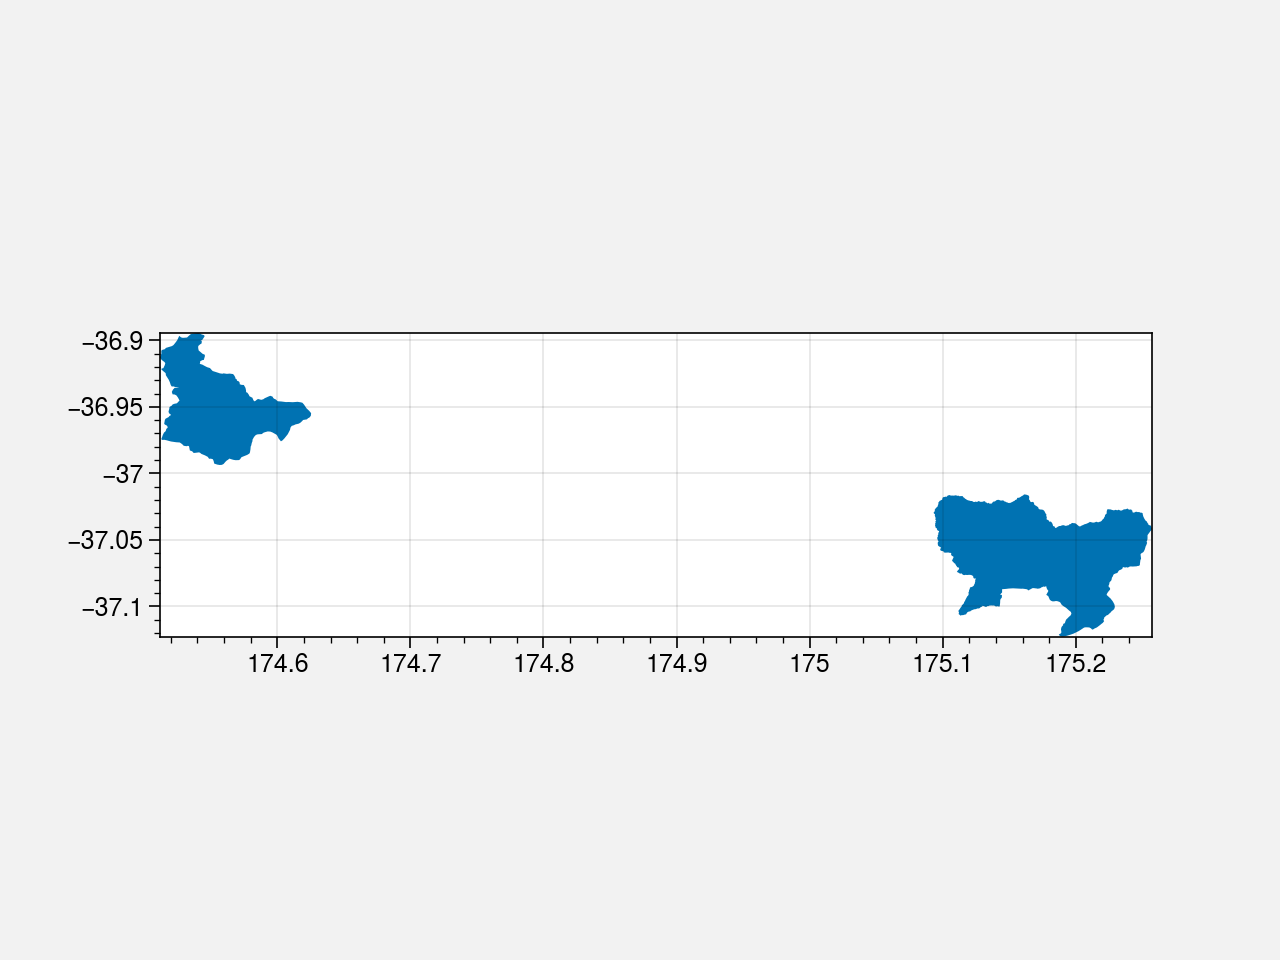

In [21]:
shape_merged.plot()

### check the crs again 

In [22]:
shape_merged.crs

{'init': 'epsg:4326', 'no_defs': True}

In [23]:
shape_merged

,geometry,GIS_ID,FAC_CODE,GRP,GRP_CODE,LAND_AREA,MSLINK,CREATEBY,CREATEDATE,MODIFYBY,MODIFYDATE,MODIFYREF
catchment,,,,,,,,,,,,
H,"POLYGON ((175.17784 -37.09125, 175.17875 -37.0...",23630,SDCOS,SD,None,21478632.56,0,wsl,2006-04-13,wsl,2006-04-13,CameronKng
W,"POLYGON ((174.58138 -36.97471, 174.58138 -36.9...",23639,None,SD,None,575982.03,0,wsl,2006-04-13,wsl,2006-04-13,CameronKng


In [24]:
shape_merged.loc[:,'catchment'] = shape_merged.index

### saves to GeoJSON 

In [25]:
shape_merged.to_file("./HUNUAS_and_WAITAKERE.json", driver="GeoJSON")